In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
colors = ['blue', 'orange', 'red', 'green', "purple", "cyan", "gray", "olive", "brown", "pink"]
w, h = 15, 5
print(plt.style.available)
plt.style.use('seaborn-white')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [8]:
def plot(paths, title, N_train = 1000, N_test = 100, prefix = './results/'):
    fig, ax = plt.subplots(1, 2, figsize = (w, h))
    N = 800;
    #train accuracy
    for i, k in enumerate(paths.keys()):
        train_acc = list(pd.read_csv(os.path.join(prefix, paths[k], 'acc', 'training_acc.csv')).to_numpy()[:,1])
        ax[0].plot(train_acc, colors[i%len(colors)], label=k, linewidth=3.0)

    ax[0].set_xlabel("Epochs", fontsize=20, fontweight='bold')
    ax[0].set_ylabel("Accuracy", fontsize=20, fontweight='bold')
    ax[0].tick_params(axis='y', labelsize=20)
    ax[0].tick_params(axis='x', labelsize=15)
    ax[0].set_title("Train Accuracy", fontweight = 'bold', fontsize = 20)

    #test accuracy
    N = 400;
    for i, k in enumerate(paths.keys()):
        test_acc = list(pd.read_csv(os.path.join(prefix, paths[k], 'acc', 'test_acc.csv')).to_numpy()[:,1])
        ax[1].plot(test_acc, colors[i%len(colors)], label=k, linewidth=3.0)

    ax[1].set_xlabel("Epochs", fontsize=20, fontweight='bold')
    ax[1].set_ylabel("Accuracy", fontsize=20, fontweight='bold')
    ax[1].tick_params(axis='y', labelsize=20)
    ax[1].tick_params(axis='x', labelsize=15)
    ax[1].set_title("Test Accuracy", fontweight = 'bold', fontsize = 20)
    ax[1].legend(loc='lower right', fontsize=20)

    fig.suptitle(title, fontsize=20, fontweight='bold');
    return fig, ax

## Varying Bit Precision


(<Figure size 1080x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <AxesSubplot:title={'center':'Test Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

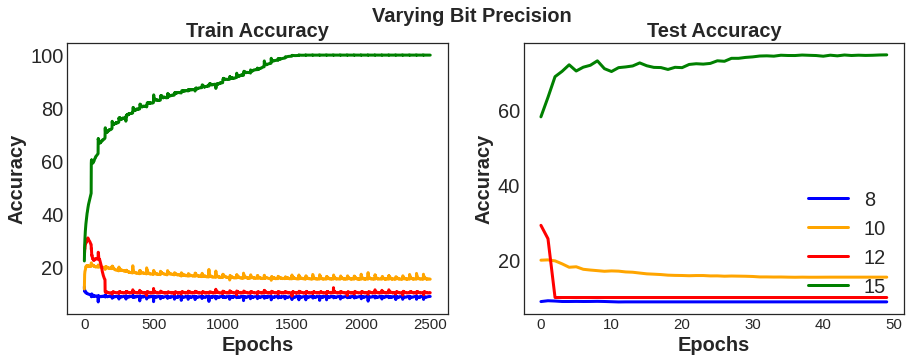

In [9]:
prefix = './results/'
paths = {
    8: 'res_10_8_4_False_0.06_False_0.04',
    10: 'res_10_10_6_False_0.06_False_0.04',
    12: 'res_10_12_6_False_0.06_False_0.04',
    15:'res_10_15_6_False_0.06_False_0.04'
}

plot(paths, "Varying Bit Precision")

## Device Variations

(<Figure size 1080x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <AxesSubplot:title={'center':'Test Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

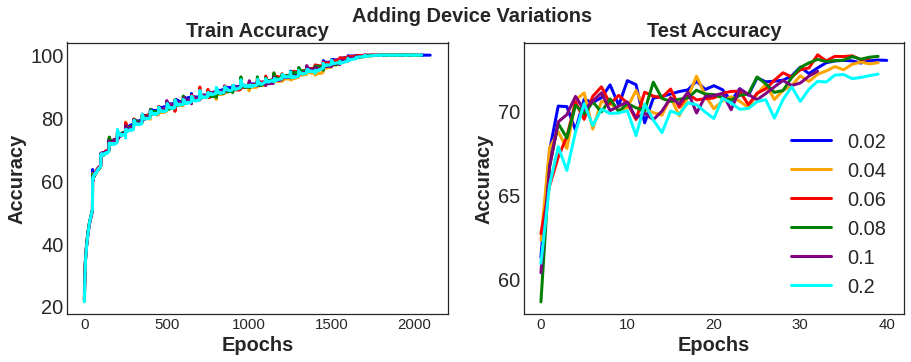

In [10]:
prefix = './results/'
params = [0.02, 0.04, 0.06, 0.08, 0.1, 0.2]
paths = {
    x: 'res_10_15_6_True_0.06_True_{}'.format(x) for x in params
}

plot(paths, "Adding Device Variations")

## Write Noise

(<Figure size 1080x360 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Train Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>,
        <AxesSubplot:title={'center':'Test Accuracy'}, xlabel='Epochs', ylabel='Accuracy'>],
       dtype=object))

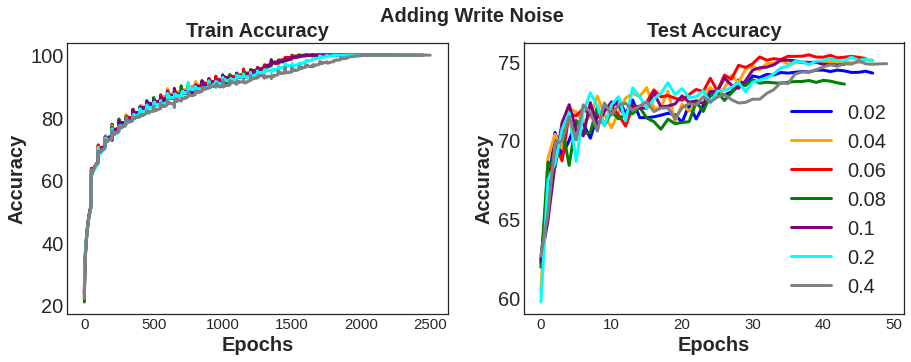

In [11]:
prefix = './results/'
params = [0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4]
paths = {
    x: 'res_10_15_6_True_{}_False_0.04'.format(x) for x in params
}

plot(paths, "Adding Write Noise")

## Refresh Frequency

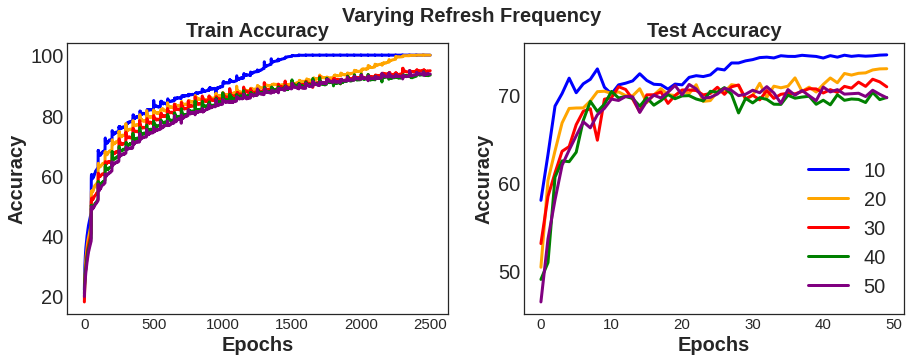

In [12]:
prefix = './results/'
params = [10, 20, 30, 40, 50]
paths = {
    x: 'res_{}_15_6_False_0.06_False_0.04'.format(x) for x in params
}

fig, ax = plot(paths, "Varying Refresh Frequency")